In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
sns.set()
sys.path.append('../src/')
%matplotlib inline

## データの読み込み

In [7]:
data_dir = '../../data/'
file_list = os.listdir(data_dir)[1:5]

In [8]:
csv_ls = []
for i in range(len(file_list)):
    tmp = pd.read_csv(data_dir+file_list[i], header=None)
    csv_ls.append(tmp)

In [9]:
len(csv_ls[3])

354

## 動きの可視化

In [ ]:
for i in range(len(csv_ls)):
    print('csv number: ', str(i))
    plt.clf()
    plt.figure(figsize=(6, 3))
    csv_ls[i][1].plot()
    plt.show()

## 形式の違い
---
### OepnPose
[OpenPose output形式](https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/output.md#keypoint-ordering)
```
// Result for COCO (18 body parts)
// POSE_COCO_BODY_PARTS {
//     {0,  "Nose"},
//     {1,  "Neck"},
//     {2,  "RShoulder"},
//     {3,  "RElbow"},
//     {4,  "RWrist"},
//     {5,  "LShoulder"},
//     {6,  "LElbow"},
//     {7,  "LWrist"},
//     {8,  "RHip"},
//     {9,  "RKnee"},
//     {10, "RAnkle"},
//     {11, "LHip"},
//     {12, "LKnee"},
//     {13, "LAnkle"},
//     {14, "REye"},
//     {15, "LEye"},
//     {16, "REar"},
//     {17, "LEar"},
//     {18, "Background"},
// }
```

### 3d-pose-baseline
---
[入力形式](https://github.com/una-dinosauria/3d-pose-baseline/blob/master/src/data_utils.py#L20)
```
H36M_NAMES = ['']*32
H36M_NAMES[0]  = 'Hip'
H36M_NAMES[1]  = 'RHip'
H36M_NAMES[2]  = 'RKnee'
H36M_NAMES[3]  = 'RFoot'
H36M_NAMES[6]  = 'LHip'
H36M_NAMES[7]  = 'LKnee'
H36M_NAMES[8]  = 'LFoot'
H36M_NAMES[12] = 'Spine'
H36M_NAMES[13] = 'Thorax'
H36M_NAMES[14] = 'Neck/Nose'
H36M_NAMES[15] = 'Head'
H36M_NAMES[17] = 'LShoulder'
H36M_NAMES[18] = 'LElbow'
H36M_NAMES[19] = 'LWrist'
H36M_NAMES[25] = 'RShoulder'
H36M_NAMES[26] = 'RElbow'
H36M_NAMES[27] = 'RWrist'
```

## 関節の3次元位置を推定

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
import data_utils
import h5py
import viz 
import cameras
from predict_3dpose import create_model

experiments/All/dropout_0.5/epochs_200/lr_0.001/residual/depth_2/linear_size1024/batch_size_64/no_procrustes/maxnorm/batch_normalization/use_stacked_hourglass/predict_17


In [5]:
FLAGS = tf.app.flags.FLAGS

order = [15, 12, 25, 26, 27, 17, 18, 19, 1, 2, 3, 6, 7, 8]

enc_in = np.zeros((1, 64))
enc_in[0] = [0 for i in range(64)]

actions = data_utils.define_actions(FLAGS.action)

SUBJECT_IDS = [1, 5, 6, 7, 8, 9, 11]

rcams = cameras.load_cameras(FLAGS.cameras_path, SUBJECT_IDS)

train_set_2d, test_set_2d, data_mean_2d, data_std_2d, dim_to_ignore_2d, dim_to_use_2d = data_utils.read_2d_predictions(
    actions, FLAGS.data_dir)
train_set_3d, test_set_3d, data_mean_3d, data_std_3d, dim_to_ignore_3d, dim_to_use_3d, train_root_positions, test_root_positions = data_utils.read_3d_data(
    actions, FLAGS.data_dir, FLAGS.camera_frame, rcams, FLAGS.predict_14)

Reading subject 1, action Directions
data/h36m/S1/StackedHourglass/Directions*.h5
data/h36m/S1/StackedHourglass/Directions.54138969.h5
data/h36m/S1/StackedHourglass/Directions.55011271.h5
data/h36m/S1/StackedHourglass/Directions.58860488.h5
data/h36m/S1/StackedHourglass/Directions.60457274.h5
data/h36m/S1/StackedHourglass/Directions_1.54138969.h5
data/h36m/S1/StackedHourglass/Directions_1.55011271.h5
data/h36m/S1/StackedHourglass/Directions_1.58860488.h5
data/h36m/S1/StackedHourglass/Directions_1.60457274.h5
Reading subject 1, action Discussion
data/h36m/S1/StackedHourglass/Discussion*.h5
data/h36m/S1/StackedHourglass/Discussion.54138969.h5
data/h36m/S1/StackedHourglass/Discussion.55011271.h5
data/h36m/S1/StackedHourglass/Discussion.58860488.h5
data/h36m/S1/StackedHourglass/Discussion.60457274.h5
data/h36m/S1/StackedHourglass/Discussion_1.54138969.h5
data/h36m/S1/StackedHourglass/Discussion_1.55011271.h5
data/h36m/S1/StackedHourglass/Discussion_1.58860488.h5
data/h36m/S1/StackedHourgla

In [26]:
poses3d.shape

(1, 96)

train_dir experiments/All/dropout_0.5/epochs_200/lr_0.001/residual/depth_2/linear_size1024/batch_size_64/no_procrustes/maxnorm/batch_normalization/use_stacked_hourglass/predict_17
Loading model experiments/All/dropout_0.5/epochs_200/lr_0.001/residual/depth_2/linear_size1024/batch_size_64/no_procrustes/maxnorm/batch_normalization/use_stacked_hourglass/predict_17/checkpoint-4874200
INFO:tensorflow:Restoring parameters from experiments/All/dropout_0.5/epochs_200/lr_0.001/residual/depth_2/linear_size1024/batch_size_64/no_procrustes/maxnorm/batch_normalization/use_stacked_hourglass/predict_17/checkpoint-4874200
length:  354
open:  ../../data/7920_1_white_4.csv


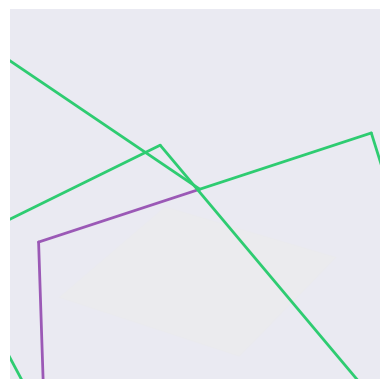

In [25]:
tf.reset_default_graph()
number = 0
device_count = {"GPU": 0}
with tf.Session(config=tf.ConfigProto(
        device_count=device_count,
        allow_soft_placement=True)) as sess:
    batch_size = 128
    model = create_model(sess, actions, batch_size)
    
    # for fileNo in range(1100):
        # print(fileNo)
        # csvName = 'csv_median/median{0:06d}.csv'.format(fileNo+1)
    data_dir = '../../data/'
    file_list = os.listdir(data_dir)[1:5]
    csvName = data_dir + file_list[2]
    df = pd.read_csv(csvName, header=None)
    print('length: ', len(df))
    print('open: ', csvName)
    f = open(csvName, 'r')

    for line in f:
        line = line.rstrip()
        l = line.split(",")
        for i in range(len(order)):
            for j in range(2):
                enc_in[0][order[i] * 2 + j] = l[i * 2 + j]

        for j in range(2):
            # Hip
            enc_in[0][0 * 2 + j] = (enc_in[0][1 * 2 + j] + enc_in[0][6 * 2 + j]) / 2
            # Neck/Nose
            enc_in[0][14 * 2 + j] = (enc_in[0][15 * 2 + j] + enc_in[0][12 * 2 + j]) / 2
            # Thorax
            enc_in[0][13 * 2 + j] = 2 * enc_in[0][12 * 2 + j] - enc_in[0][14 * 2 + j]

    # f.close()

        spine_x = enc_in[0][24]
        spine_y = enc_in[0][25]

        enc_in = enc_in[:, dim_to_use_2d]
        mu = data_mean_2d[dim_to_use_2d]
        stddev = data_std_2d[dim_to_use_2d]
        enc_in = np.divide((enc_in - mu), stddev)

        dp = 1.0
        dec_out = np.zeros((1, 48))
        dec_out[0] = [0 for i in range(48)]
        _, _, poses3d = model.step(sess, enc_in, dec_out, dp, isTraining=False)

        enc_in = data_utils.unNormalizeData(enc_in, data_mean_2d, data_std_2d, dim_to_ignore_2d)
        poses3d = data_utils.unNormalizeData(poses3d, data_mean_3d, data_std_3d, dim_to_ignore_3d)

        gs1 = gridspec.GridSpec(1, 1)
        gs1.update(wspace=-0.00, hspace=0.05)  # set the spacing between axes.
        plt.axis('off')

        subplot_idx, exidx = 1, 1

        max = 0
        min = 10000
        for i in range(poses3d.shape[0]):
            for j in range(32):
                tmp = poses3d[i][j * 3 + 2]
                poses3d[i][j * 3 + 2] = poses3d[i][j * 3 + 1]
                poses3d[i][j * 3 + 1] = tmp
                if poses3d[i][j * 3 + 2] > max:
                    max = poses3d[i][j * 3 + 2]
                if poses3d[i][j * 3 + 2] < min:
                    min = poses3d[i][j * 3 + 2]

        for i in range(poses3d.shape[0]):
            for j in range(32):
                poses3d[i][j * 3 + 2] = max - poses3d[i][j * 3 + 2] + min
                poses3d[i][j * 3] += (spine_x - 630)
                poses3d[i][j * 3 + 2] += (500 - spine_y)

        # Plot 3d predictions
        ax3 = plt.subplot(gs1[subplot_idx - 1], projection='3d')

        if np.min(poses3d) < -10000:
             poses3d = before_pose

        p3d = poses3d
        viz.show3Dpose(p3d, ax3, lcolor="#9b59b6", rcolor="#2ecc71")

        # pngName = 'png/test{0:06d}.png'.format(fileNo+1)
        pngName = 'output/test_{0:06d}.png'.format(number+1)
        plt.savefig(pngName)

        before_pose = poses3d
        
        number += 1
        
        if number >= 100:
            break
        
    f.close()

In [19]:
poses3d.shape

(1, 96)

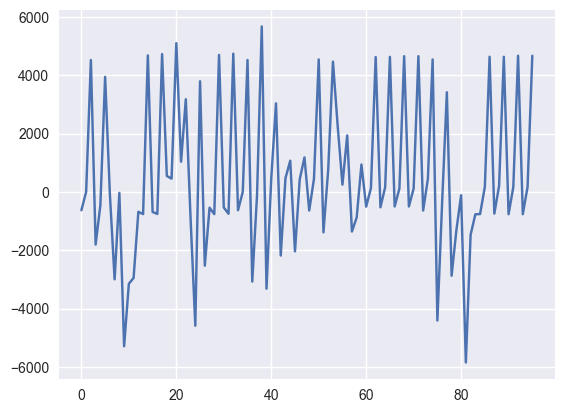

In [23]:
plt.figure()
plt.plot(poses3d[0])
plt.show()